In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
mnist_training_data = pd.read_csv("mnist_train.csv")
mnist_testing_data = pd.read_csv("mnist_test.csv")

In [3]:
X_train = mnist_training_data.drop(['label'], axis='columns', inplace=False)
Y_train = mnist_training_data['label']
X_test = mnist_testing_data.drop(['label'], axis='columns', inplace=False)
Y_test = mnist_testing_data['label']

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=9)
lda.fit(X_train, Y_train)
lda_train_data = lda.transform(X_train)
lda_test_data = lda.transform(X_test)

In [5]:
sum(lda.explained_variance_ratio_)

1.0

In [6]:
clf = SVC()
clf.fit(lda_train_data, Y_train)
print("訓練資料辨識率:",np.mean(clf.predict(lda_train_data) == Y_train))
print("測試資料辨識率:",np.mean(clf.predict(lda_test_data) == Y_test))

訓練資料辨識率: 0.9259833333333334
測試資料辨識率: 0.9215


In [24]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=10)
nmf.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [31]:
X_train_nmf = nmf.transform(X_train) 
X_test_nmf = nmf.transform(X_test) 
X_reconstructed = nmf.inverse_transform(X_train_nmf)
X_reconstructed.shape

(60000, 784)

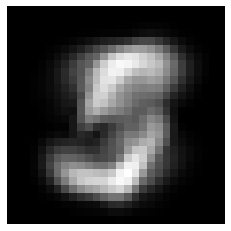

5


In [32]:
X_reconstructed = X_reconstructed[0].reshape(28,28)
plt.imshow(X_reconstructed, cmap='Greys_r')
plt.axis('off')
plt.show()
print(Y_train[0])